<a href="https://colab.research.google.com/github/rodrigosantosti01/business_analytics_fiap/blob/main/trabalho_eda_business%20analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Relatório sobre a análise exploratória da Netflix - Kaggle

Netflix Inc. é uma produtora americana de serviço streamings por assinatura. Lançado em 29 de agosto de 1997, oferece uma biblioteca de filmes e séries de televisão por meio de acordos de distribuição e produções próprias, conhecidas como Netflix Originals.

Este dataset têm mais de 8.000 filmes ou programas de TV disponíveis em sua plataforma. Em meados de 2021, eles tiveram mais de 200 milhões de assinantes em todo o mundo. Este conjunto de dados tabulares consiste em listas de todos os filmes e programas de TV disponíveis no Netflix, juntamente com detalhes como elenco, diretores, classificações, ano de lançamento, duração, etc.

você poderá visualizar o dataset clicando [neste link](https://www.kaggle.com/datasets/shivamb/netflix-shows)

####Descrição dos dados


01.   show_id - Identificador único para cada elemento do dataset
02.   type - Identificador do tipo do conteúdo (filme ou série)
03.   director - Diretor do conteúdo (filme ou série)
04.   cast - Atores do conteúdo (filme ou série)
05.   country - País onde o conteúdo (filme ou série) foi produzido
06.   date_added - Data que o conteúdo foi adicionado na plataforma Netflix
07.   release_year - Ano de lançamento do conteúdo (filme ou série)
08.   rating - Classificação do conteúdo (filme ou série)
09.   duration - Duração do conteúdo filme em minutos séries em temporadas
10.  listed_in - Gênero do conteúdo (filme ou série)
11.  description - sinopse do conteúdo (filme ou série)

####Carregando biliotecas e dataset

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
from collections import Counter
data = pd.read_csv('netflix_titles.csv')

#### Análise por tipo (TV Show e Filmes)

In [112]:
col = "type"
grouped = data[col].value_counts().reset_index()
grouped

,index,type
0,Movie,6131
1,TV Show,2676


In [54]:
col = "type"
grouped = data[col].value_counts().reset_index()
grouped = grouped.rename(columns = {col : "count", "index" : col})
trace = go.Pie(labels=grouped[col], values=grouped['count'], pull=[0.05, 0], marker=dict(colors=['#2D2926', '#E50914']))
layout = go.Layout(title="", height=500, legend=dict(x=0.1, y=1.1))
fig = go.Figure(data = [trace], layout = layout)
iplot(fig)

É possível observar que a maior parte (equivalente  2/3) do conteúdo da netflix são de filmes e apenas 30.4% de séries.

## Principais categorias

In [55]:
data2 = data.copy()
col = "listed_in"
categories = ", ".join(data2['listed_in']).split(", ")
counter_list = Counter(categories).most_common(50)
labels = [_[0] for _ in counter_list][::-1]
values = [_[1] for _ in counter_list][::-1]
trace1 = go.Bar(y=labels, x=values, orientation="h", name="TV Shows", marker=dict(color="#2D2926"))

data_show = [trace1]
layout = go.Layout(title="",height=500,legend=dict(x=0.1, y=1.1, orientation="h",))
fig = go.Figure(data_show,layout=layout)
fig.show()

Na somatória entre filmes e séries, é possivel identificar que aproximadamente **30%** está para a categoria **Dramas** e 25% para séries de tv internacionais.

## Lançamento de filmes e séries por ano

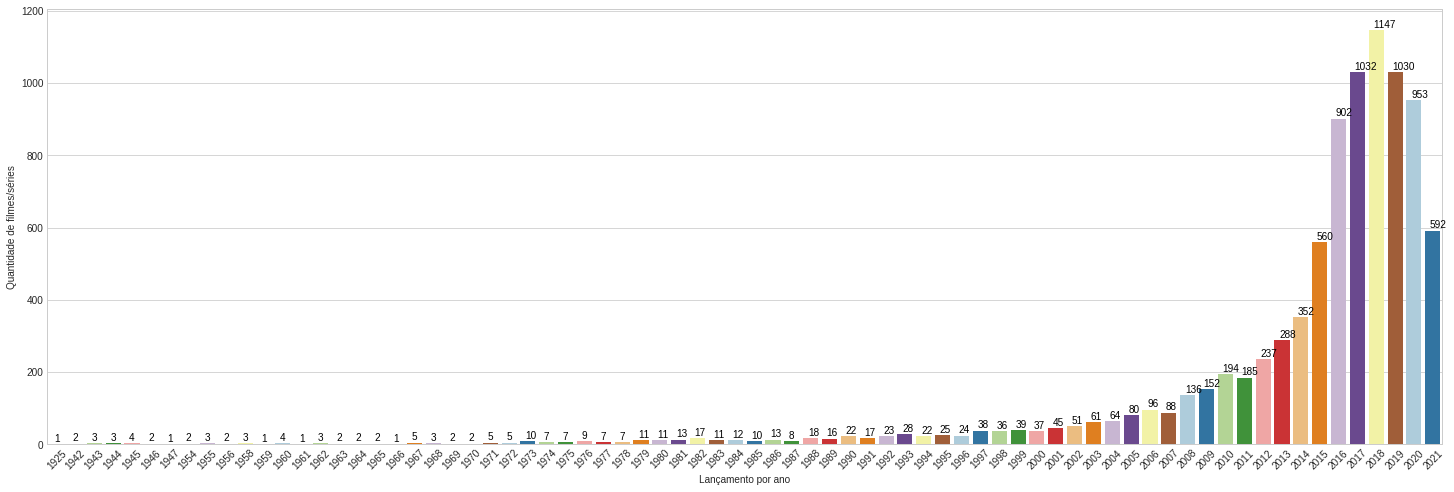

In [59]:
plt.figure(figsize = (25, 8))
plt.style.use('seaborn-whitegrid')
ax = sns.countplot(x = 'release_year', data = data, palette = "Paired")
plt.xlabel('Lançamento por ano')
plt.ylabel('Quantidade de filmes/s')
plt.xticks(rotation = 45)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va = 'bottom', color = 'black')

É  possível observar que os períodos de 2016 a 2020 houveram mais lançamentos de filmes e séries. 

*obs: years of release é o lançamento original do filme*

## Produção de filmes e séries por País

<ipython-input-62-c7855e811609>:3: FutureWarning:

This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.



Text(0.5, 0, 'Quantidade de filmes/séries')

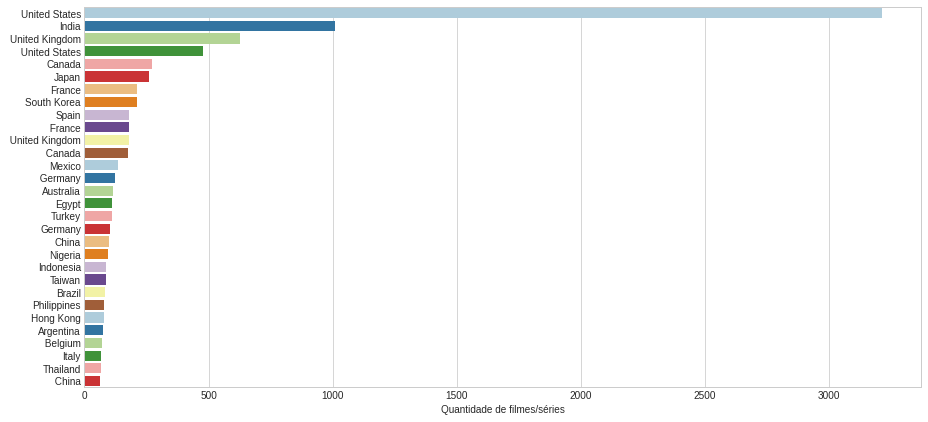

In [62]:
country_count = data.copy()
country_count = pd.concat([country_count, data["country"].str.split(",", expand = True)], axis = 1)
country_count = country_count.melt(id_vars = ["type", "title"], value_vars = range(12), value_name = "country")
country_count = country_count[country_count["country"].notna()]

plt.figure(figsize = (15, 7))
country = country_count["country"].value_counts()[:30]
sns.barplot(x = country, y = country.index, palette = "Paired")
plt.xlabel("Quantidade de filmes/séries")

É possível observar que 36% dos conteúdos foram produzidos nos Estados Unidos e em segundo lugar com 11% na Índia.

##Análise sobre Duração de filmes e séries da Netflix

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 0, 'Duração (minutos)')

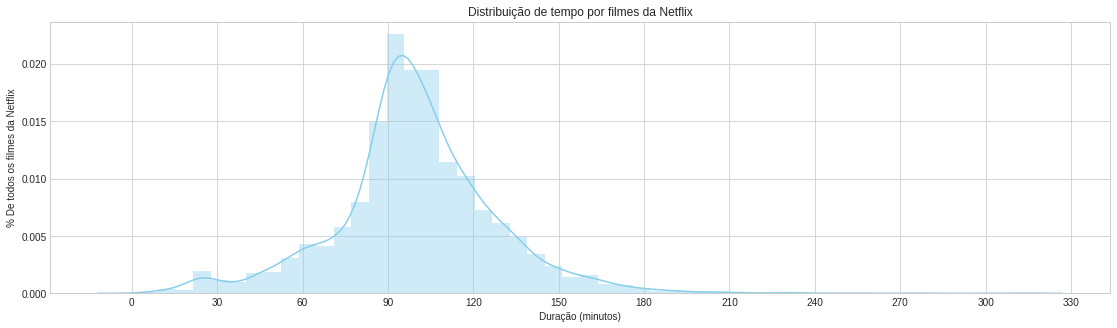

In [108]:
data_duration = data.copy()
data_duration.duration = data_duration.duration.str.replace(' min','')
df3 = data_duration[data_duration['type']=='Movie']
fig, ax = plt.subplots(1, figsize=(19, 5))
g1 = sns.distplot(df3.duration, color='skyblue');
g1.set_xticks(np.arange(0,360,30))
g1.set_title("Distribuição de tempo por filmes da Netflix")
g1.set_ylabel("% De todos os filmes da Netflix")
g1.set_xlabel("Duração (minutos)")

A maioria dos filmes listados na plataforma da Netflix possuem em média uma duração de aproximadamente 90 minutos.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 0, 'Temporada(s)')

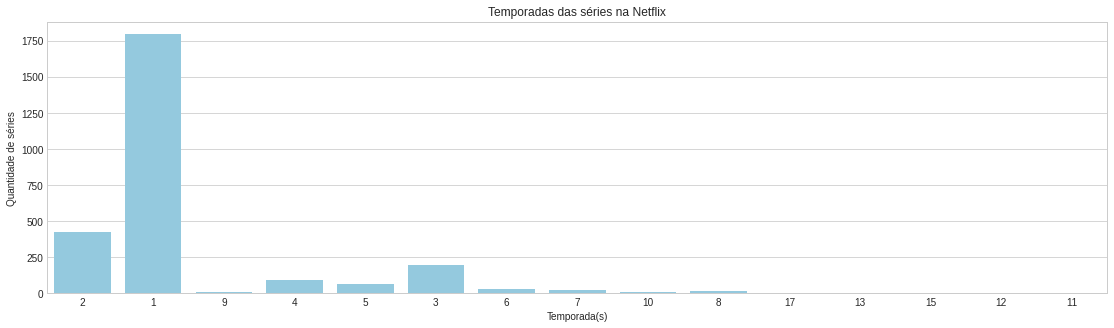

In [110]:
df4 = data_duration[data_duration['type']=='TV Show']
df4.duration = df4.duration.str.replace(' Seasons','') #remove seasons and season
df4.duration = df4.duration.str.replace(' Season','')
fig2, ax2 = plt.subplots(1, figsize=(19, 5))
g2 = sns.countplot(df4.duration, color='skyblue');
g2.set_title("Temporadas das séries na Netflix")
g2.set_ylabel("Quantidade de séries")
g2.set_xlabel("Temporada(s)")

Aproximadamente 65% das séries da Netflix possuem apenas uma temporada